## Part 1 ##

In [1]:
data = [1,0,0,3,1,1,2,3,1,3,4,3,1,5,0,3,2,1,10,19,1,19,6,23,2,23,13,27,
        1,27,5,31,2,31,10,35,1,9,35,39,1,39,9,43,2,9,43,47,1,5,47,51,2,
        13,51,55,1,55,9,59,2,6,59,63,1,63,5,67,1,10,67,71,1,71,10,75,2,
        75,13,79,2,79,13,83,1,5,83,87,1,87,6,91,2,91,13,95,1,5,95,99,1,
        99,2,103,1,103,6,0,99,2,14,0,0]
test_data = [1,9,10,3,2,3,11,0,99,30,40,50]

In [2]:
def run1(mydata):
    pos = 0
    opcode = mydata[pos]
    while opcode != 99:
        i1pos,i2pos,opos = mydata[pos+1:pos+4]
        if opcode == 1:
            mydata[opos] = mydata[i1pos] + mydata[i2pos]
        elif opcode == 2:
            mydata[opos] = mydata[i1pos]*mydata[i2pos]
        else:
            raise ValueError(f'Invalid opcode: {opcode}')
        yield pos
        pos += 4
        opcode = mydata[pos]

In [3]:
test_data_copy = test_data.copy()
for pos in run1(test_data_copy):
    print(pos, test_data_copy)

0 [1, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]
4 [3500, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]


In [4]:
assert(test_data_copy[0] == 3500)

In [5]:
data_1202 = data.copy()
data_1202[1] = 12
data_1202[2] = 2
for pos in run1(data_1202):
    continue
print(data_1202[0])

3790645


## Part 2 ##

In [6]:
def run2(noun, verb):
    mydata = data.copy()
    mydata[1] = noun
    mydata[2] = verb
    pos = 0
    opcode = mydata[pos]
    while opcode != 99:
        i1pos,i2pos,opos = mydata[pos+1:pos+4]
        if opcode == 1:
            mydata[opos] = mydata[i1pos] + mydata[i2pos]
        elif opcode == 2:
            mydata[opos] = mydata[i1pos]*mydata[i2pos]
        else:
            raise ValueError(f'Invalid opcode: {opcode}')
        pos += 4
        opcode = mydata[pos]
    return mydata[0]

In [7]:
run2(12, 2) == 3790645

True

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [9]:
nouns = [0, 10, 20, 40, 60, 99]
verbs = [0, 10, 20, 40, 60, 99]
index = pd.MultiIndex.from_product([nouns, verbs], names = ["noun", "verb"])
df = pd.DataFrame(index = index).reset_index()
df.head()

,noun,verb
0,0,0
1,0,10
2,0,20
3,0,40
4,0,60


In [10]:
def val_from_row(row):
    return run2(row['noun'], row['verb'])
df['val'] = df.apply(val_from_row, axis=1)
df['offset'] = df['val'] - df['val'].min()

In [11]:
df

,noun,verb,val,offset
0,0,0,190643,0
1,0,10,190653,10
2,0,20,190663,20
3,0,40,190683,40
4,0,60,190703,60
5,0,99,190742,99
6,10,0,3190643,3000000
7,10,10,3190653,3000010
8,10,20,3190663,3000020
9,10,40,3190683,3000040


So, val = f(noun) + verb.

In [12]:
df0 = df[df['verb'] == 0]
df0

,noun,verb,val,offset
0,0,0,190643,0
6,10,0,3190643,3000000
12,20,0,6190643,6000000
18,40,0,12190643,12000000
24,60,0,18190643,18000000
30,99,0,29890643,29700000


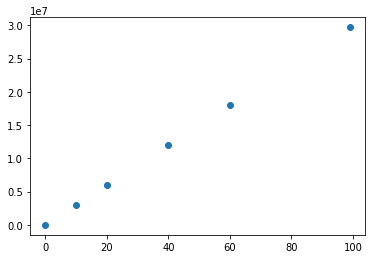

In [13]:
plt.plot(df0['noun'], df0['offset'], 'o')

Looks like a straight line. Let's check:

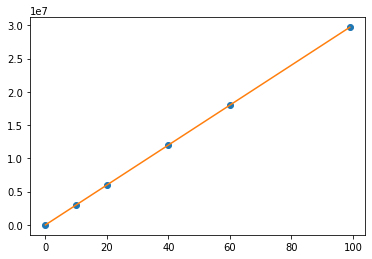

In [14]:
plt.plot(df0['noun'], df0['offset'], 'o')
plt.plot([0, 99], [df0['offset'].iloc[0], df0['offset'].iloc[-1]], '-')

In [15]:
m = (df0['offset'].loc[12] - df0['offset'].loc[6])/(df['noun'].loc[12]-df['noun'].loc[6])
m

300000.0

So, $f(n,v) = 300000*n + v + 190643 = 19690720$ (the target value from the puzzle).

Or, $300000*n + v = 19500077$. So, $v = 77$, and $n = 19500000/300000 = 65$

In [16]:
noun, verb = 65, 77
run2(noun, verb)

19690720

In [17]:
100*noun+verb

6577